In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Reading the dataset.**

In [2]:
df=pd.read_csv('bank.csv')

**Important observations from the data set.**

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

From the above data analysis we can infer that there are 10,000 instances in our dataset.\
**Continuous Variables:** Credit Score, Age, Balance, Estimated Salary\
**Categorical Varibles:** Geography, Gender, Tenure, No.ofProduct, HasCrCard, IsActiveMember, Exited.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Five point summary** hepls us detect data distribution of continuous variables, we can spot outliers in Balance and estimated salary.

**Categorical features distribution:**

In [12]:
df['Geography'].value_counts(normalize=True)*100 # 3 categories France,Germany and Spain

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [13]:
df['Gender'].value_counts(normalize=True)*100 #2 almost balanced categories, male and female

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [14]:
df['Tenure'].value_counts(normalize=True)*100 #Tenure has 11 categories starting from 0 till 10

2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64

In [15]:
df['NumOfProducts'].value_counts(normalize=True)*100 #4 categories in number of prodcuts

1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64

In [16]:
df['HasCrCard'].value_counts(normalize=True)*100 #2 categories. 1 for Yes 0 for No.

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

In [17]:
df['IsActiveMember'].value_counts(normalize=True)*100 #2 categories. 1 for Yes 0 for No.

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

In [18]:
df['Exited'].value_counts(normalize=True)*100 #2 categories. 1 for Yes 0 for No.

0    79.63
1    20.37
Name: Exited, dtype: float64

**Null value check:**

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no null values found.

**Outlier check:**

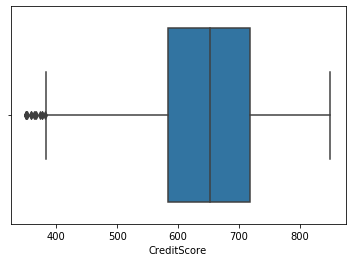

In [23]:
sns.boxplot(df['CreditScore'])

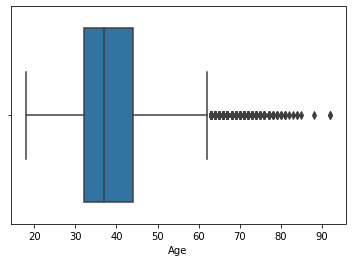

In [26]:
sns.boxplot(df['Age'])

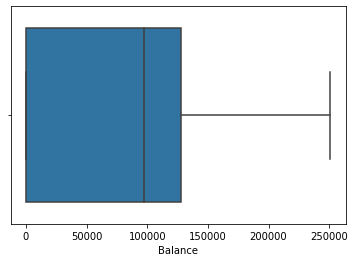

In [24]:
sns.boxplot(df['Balance'])

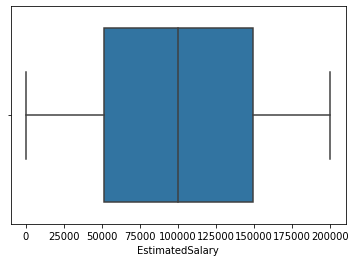

In [25]:
sns.boxplot(df['EstimatedSalary'])

There are outliers present in CreditScore and Age features.\
Possible treatment before model building:\
    1) Outlier Removal\
    2) Standard Scaling

We will opt for Standard Scaling as it will prevent loss in datapoints. We'll do standard Scaler on continuous variables before building our Machine Learning Model.

**Target Variable distribution**

In [27]:
df['Exited'].value_counts(normalize=True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

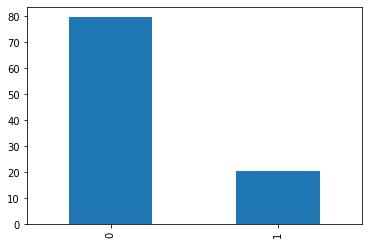

In [32]:
(df['Exited'].value_counts(normalize=True)*100).plot(kind='bar')

As we can see the target variable is imbalanced in 80:20 ratio. We can perform undersampling or oversampling before model building to prevent bias due to this imbalance. 

**Relationships among variables.**

**a.Plotting relevant categorical plots. Finding out which are the variables most correlated with Target?\
b.Performing statistical tests to find out if the Independent variables are associated with the Target
Variable.**

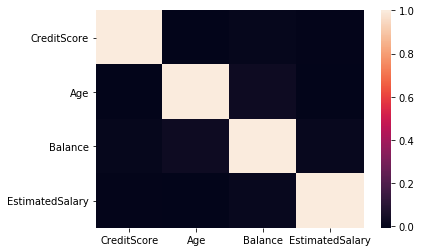

In [82]:
sns.heatmap(df[['CreditScore','Age','Balance','EstimatedSalary']].corr()) # no intra correlation

***As our target variable is categorical, we'll check relationships between categorical and continuous independent variable using box plot, and crosstab/barplot when independent variable is categorical.***

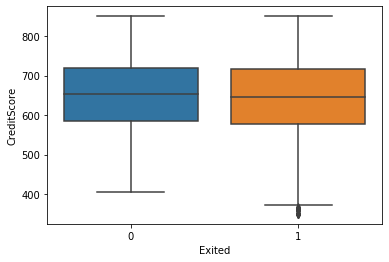

In [36]:
sns.boxplot(df['Exited'],df['CreditScore'])

Inference: Comparing Churn with credit score. There are customers with lower credit scores in churned category compared to not-churned.

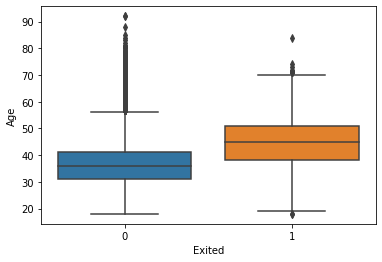

In [37]:
sns.boxplot(df['Exited'],df['Age'])

Inference: Churn customer has high median age and a smaller bracket of customer based on age.

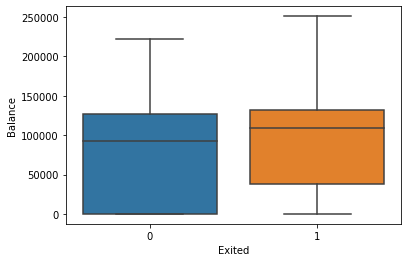

In [38]:
sns.boxplot(df['Exited'],df['Balance'])

Inference: Churned customers have a better balance amount

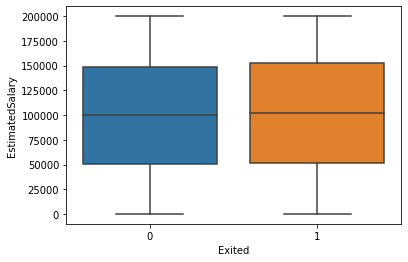

In [39]:
sns.boxplot(df['Exited'],df['EstimatedSalary'])

Inference: Almost Similar Estimated salaries on the basis of churn.

**Barplots/CountPlots for categorical.**

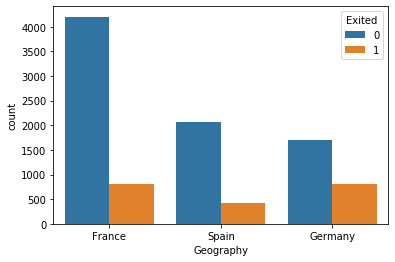

In [40]:
sns.countplot(x='Geography',hue='Exited',data=df)

Inference: Lowest amount of churners from spain, germany has more churner RATIO. France churner ratio is the lowest.

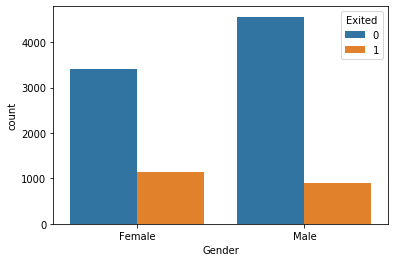

In [41]:
sns.countplot(x='Gender',hue='Exited',data=df)

Inference: Low Churner RATIO in male compared to female

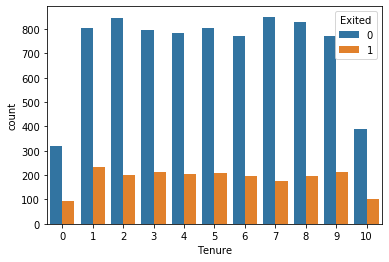

In [42]:
sns.countplot(x='Tenure',hue='Exited',data=df)

Inference: Almost similar churn ratio except with 0 and 10 years tenure.

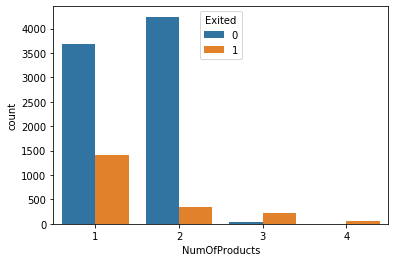

In [43]:
sns.countplot(x='NumOfProducts',hue='Exited',data=df)

Inference: A very low churn ratio when numof prducts are 2. High churn in case of 3 and 4.

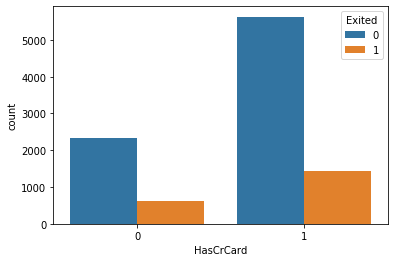

In [44]:
sns.countplot(x='HasCrCard',hue='Exited',data=df)

Low ratio churned in case of have credit card.

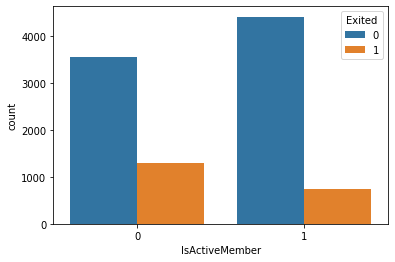

In [45]:
sns.countplot(x='IsActiveMember',hue='Exited',data=df)

 Very low ratio of churning in case of active members.

**Using pairplot to draw inferences on the distribution based on target variable. Pair plot will also help in determining good features for building the model. Will also help to detect any intra-correlation.**

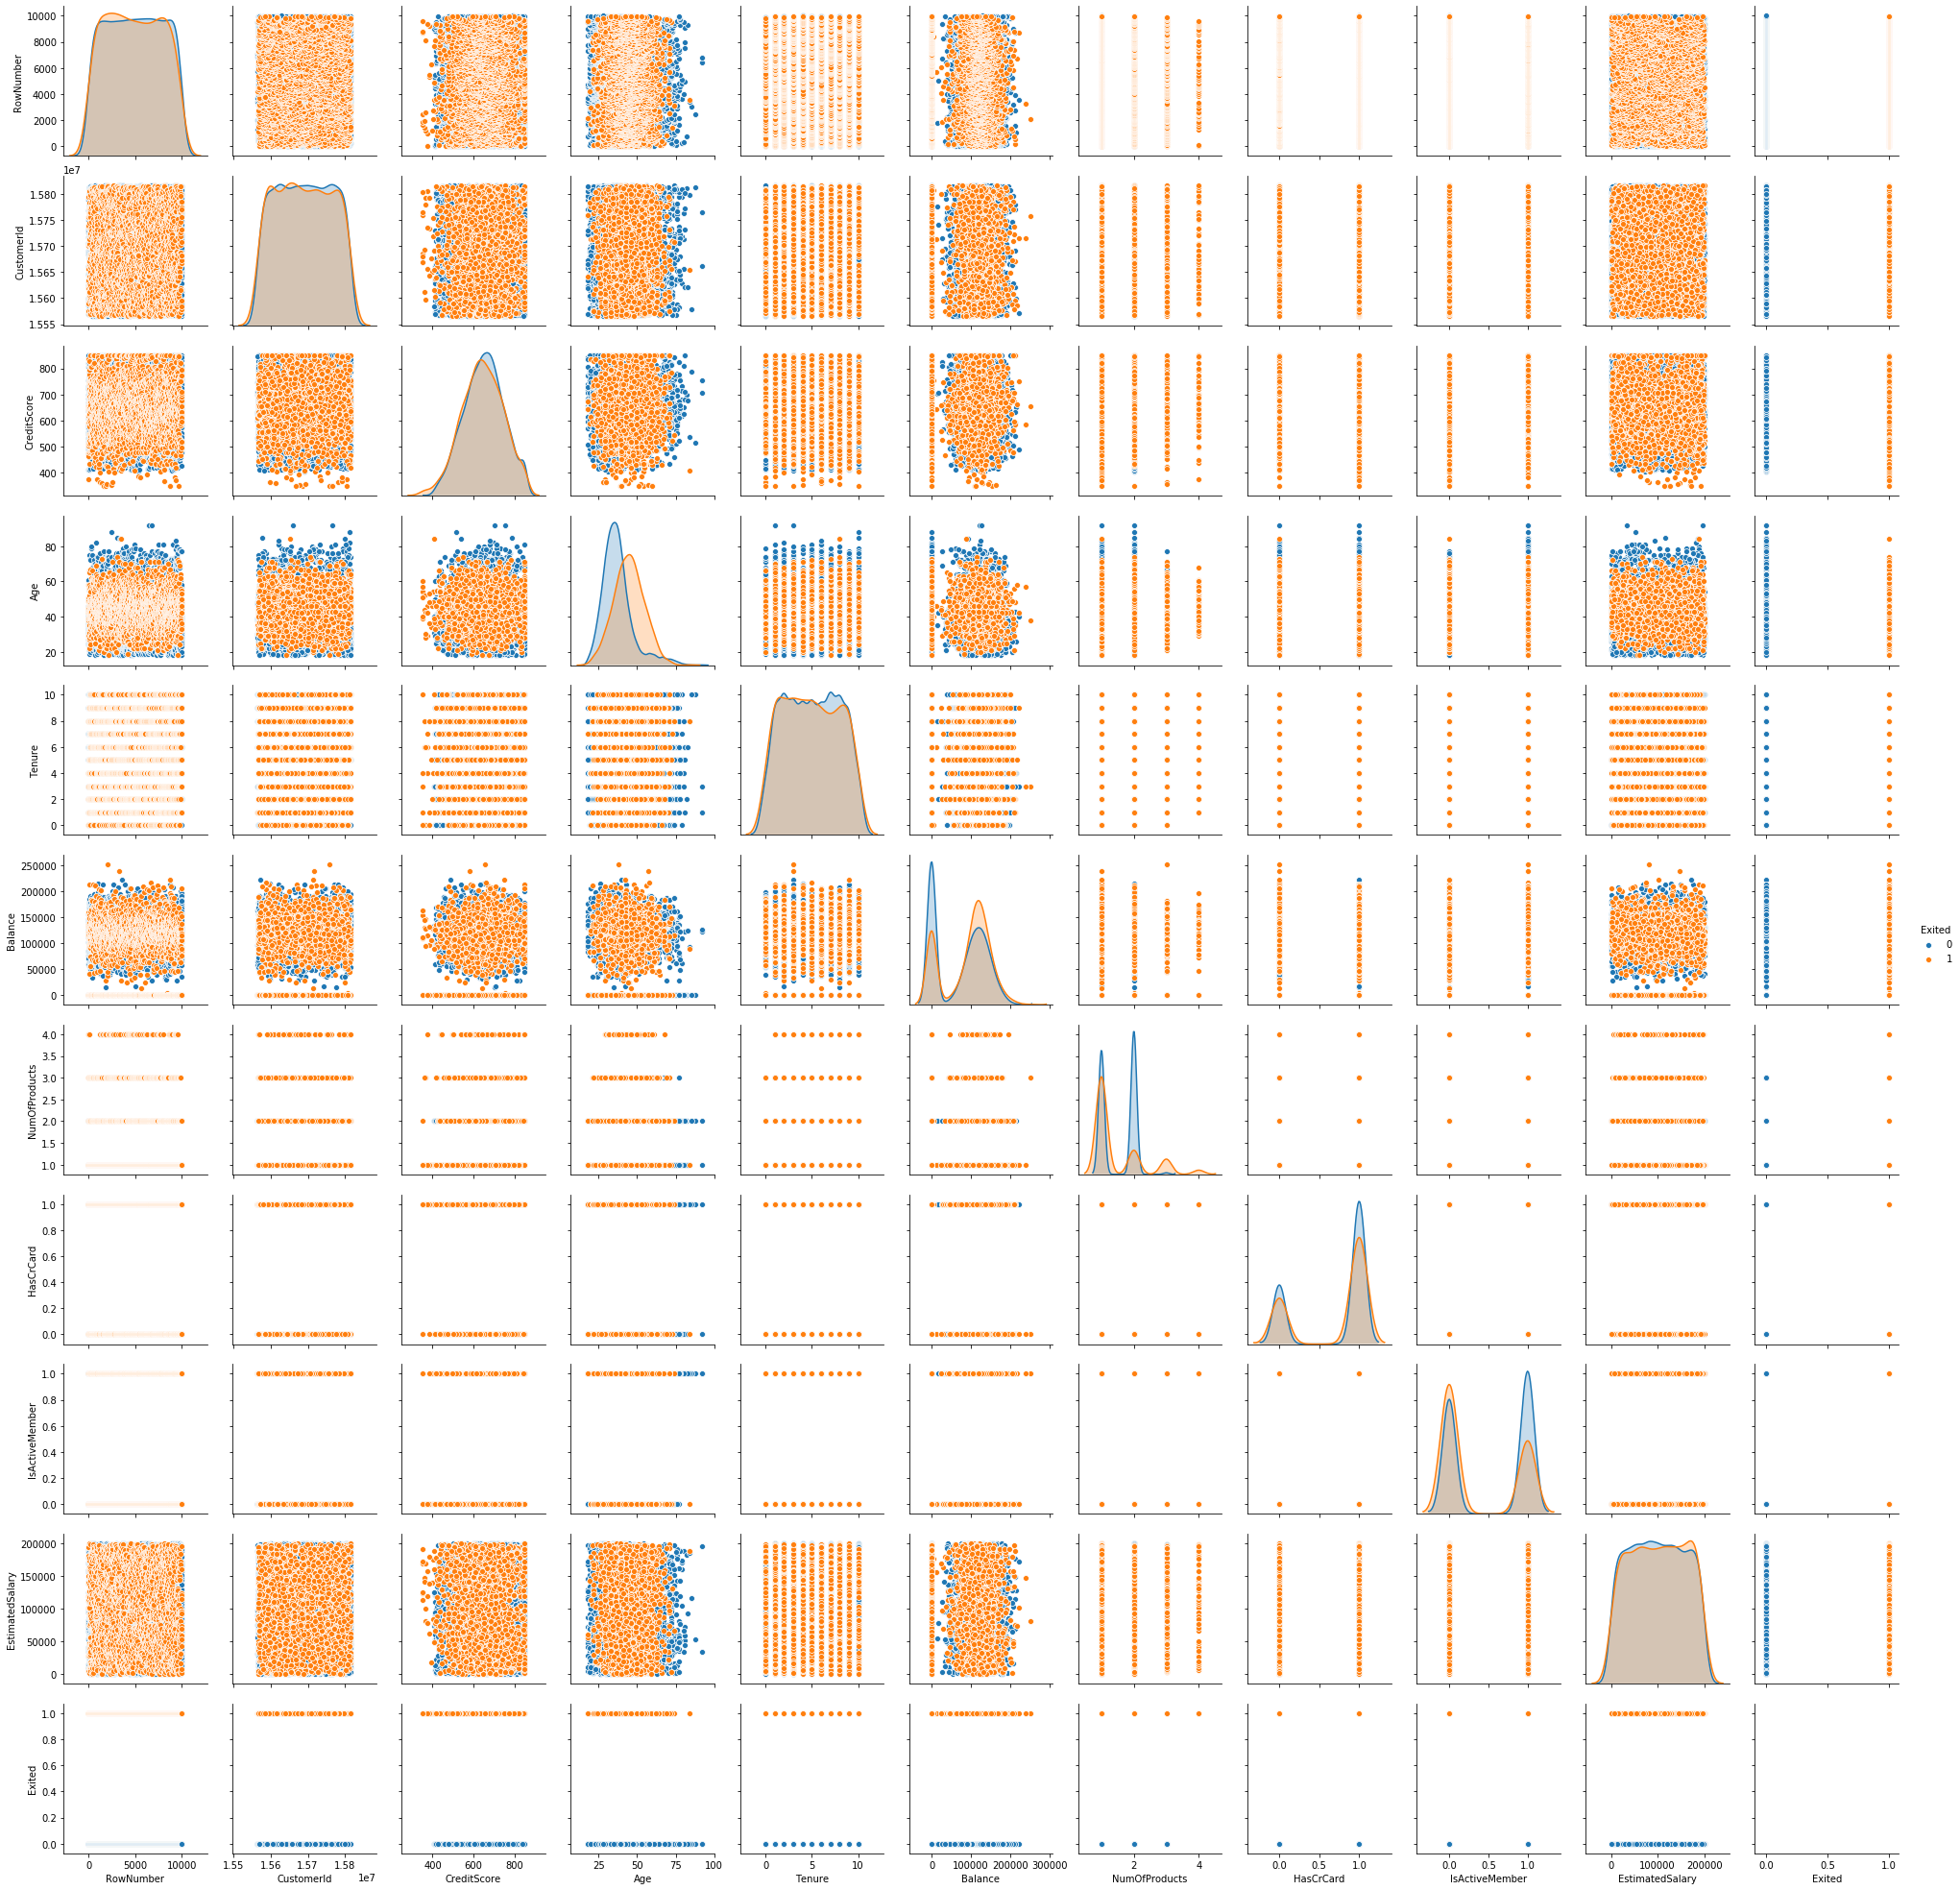

In [34]:
sns.pairplot(df,hue='Exited',diag_kind='kde')

**Inference:** 1(orange) is for churned(exited) 0 (blue) is otherwise. We can see that CREDIT score is unable to distribute churn and not churn. There is a massive overlap. Hence credit score is a less important feature in this case. Age gives some distribution. Tenure is a categorical variable and we can spot the overlapping is not there in the last 3 categories hence it can be used as a feature for distribution but not a great feature. Balance is a good feature for distribution. No of products, Hascreditcard and active members also help in distrbution but they are not great features. Estimated feature is fully overlapping hence a low importance feature.\
We can either drop low importance features but some algorithms like Random forest automatically take care of low important features. hence we will not drop any features for our base model.

**BEFORE GOING further lets SCALE and Lable Encode the DATA**

In [46]:
scale = df[['CreditScore','Age','Balance','EstimatedSalary']]
normalized_df=(scale-scale.mean())/scale.std()
df = df.drop(['CreditScore','Age','Balance','EstimatedSalary'], 1)
df = pd.concat([df,normalized_df],axis=1)
df.head()

,RowNumber,CustomerId,Surname,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore,Age,Balance,EstimatedSalary
0,1,15634602,Hargrave,France,Female,2,1,1,1,1,-0.326205,0.293503,-1.225786,0.021885
1,2,15647311,Hill,Spain,Female,1,1,0,1,0,-0.440014,0.198154,0.117344,0.216523
2,3,15619304,Onio,France,Female,8,3,1,0,1,-1.536717,0.293503,1.332987,0.240675
3,4,15701354,Boni,France,Female,1,2,0,0,0,0.501496,0.007456,-1.225786,-0.108912
4,5,15737888,Mitchell,Spain,Female,2,1,1,1,0,2.063781,0.388852,0.785689,-0.365258


In [48]:
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})

In [49]:
df['Geography']=df['Geography'].replace({'France':0,'Spain':1,'Germany':2})

In [50]:
df.head()

,RowNumber,CustomerId,Surname,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore,Age,Balance,EstimatedSalary
0,1,15634602,Hargrave,0,0,2,1,1,1,1,-0.326205,0.293503,-1.225786,0.021885
1,2,15647311,Hill,1,0,1,1,0,1,0,-0.440014,0.198154,0.117344,0.216523
2,3,15619304,Onio,0,0,8,3,1,0,1,-1.536717,0.293503,1.332987,0.240675
3,4,15701354,Boni,0,0,1,2,0,0,0,0.501496,0.007456,-1.225786,-0.108912
4,5,15737888,Mitchell,1,0,2,1,1,1,0,2.063781,0.388852,0.785689,-0.365258


DROP rownumber,customerid,surname:

In [52]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore,Age,Balance,EstimatedSalary
0,0,0,2,1,1,1,1,-0.326205,0.293503,-1.225786,0.021885
1,1,0,1,1,0,1,0,-0.440014,0.198154,0.117344,0.216523
2,0,0,8,3,1,0,1,-1.536717,0.293503,1.332987,0.240675
3,0,0,1,2,0,0,0,0.501496,0.007456,-1.225786,-0.108912
4,1,0,2,1,1,1,0,2.063781,0.388852,0.785689,-0.365258


**Splitting data\
Checking if train and test representative of the overall data visually and statistically.**

In [53]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [57]:
X_train['label']=1 #label test and train data
X_test['label']=0

C:\Users\Mohd Zuhaib\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mohd Zuhaib\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
from scipy.stats import ttest_ind

Null Hypothesis: Mean0 = Mean1\
Alternate: mean0!=mean1

In [59]:
ttest_ind(X_train['CreditScore'],X_test['CreditScore'])

Ttest_indResult(statistic=1.0738790489852408, pvalue=0.2829028113487997)

In [60]:
ttest_ind(X_train['Age'],X_test['Age'])

Ttest_indResult(statistic=0.5438710951400406, pvalue=0.5865423080886356)

In [61]:
ttest_ind(X_train['Balance'],X_test['Balance'])

Ttest_indResult(statistic=-1.4934991805979432, pvalue=0.1353381246391211)

In [62]:
ttest_ind(X_train['EstimatedSalary'],X_test['EstimatedSalary'])

Ttest_indResult(statistic=-0.7771433805543213, pvalue=0.43709256917998884)

We are performing TTest to check significant difference in the means of the Splitted data in train and test.\
We are getting p-values >0.05 HENCE we failed to reject Null Hypothesis.\
Which means there is no significant difference in the means of the TEST and TRAIN data

OTHER METHOD TO CHECK IS DISTRIBUTION ON THE BASIS OF SPLITTING:

C:\Users\Mohd Zuhaib\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mohd Zuhaib\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


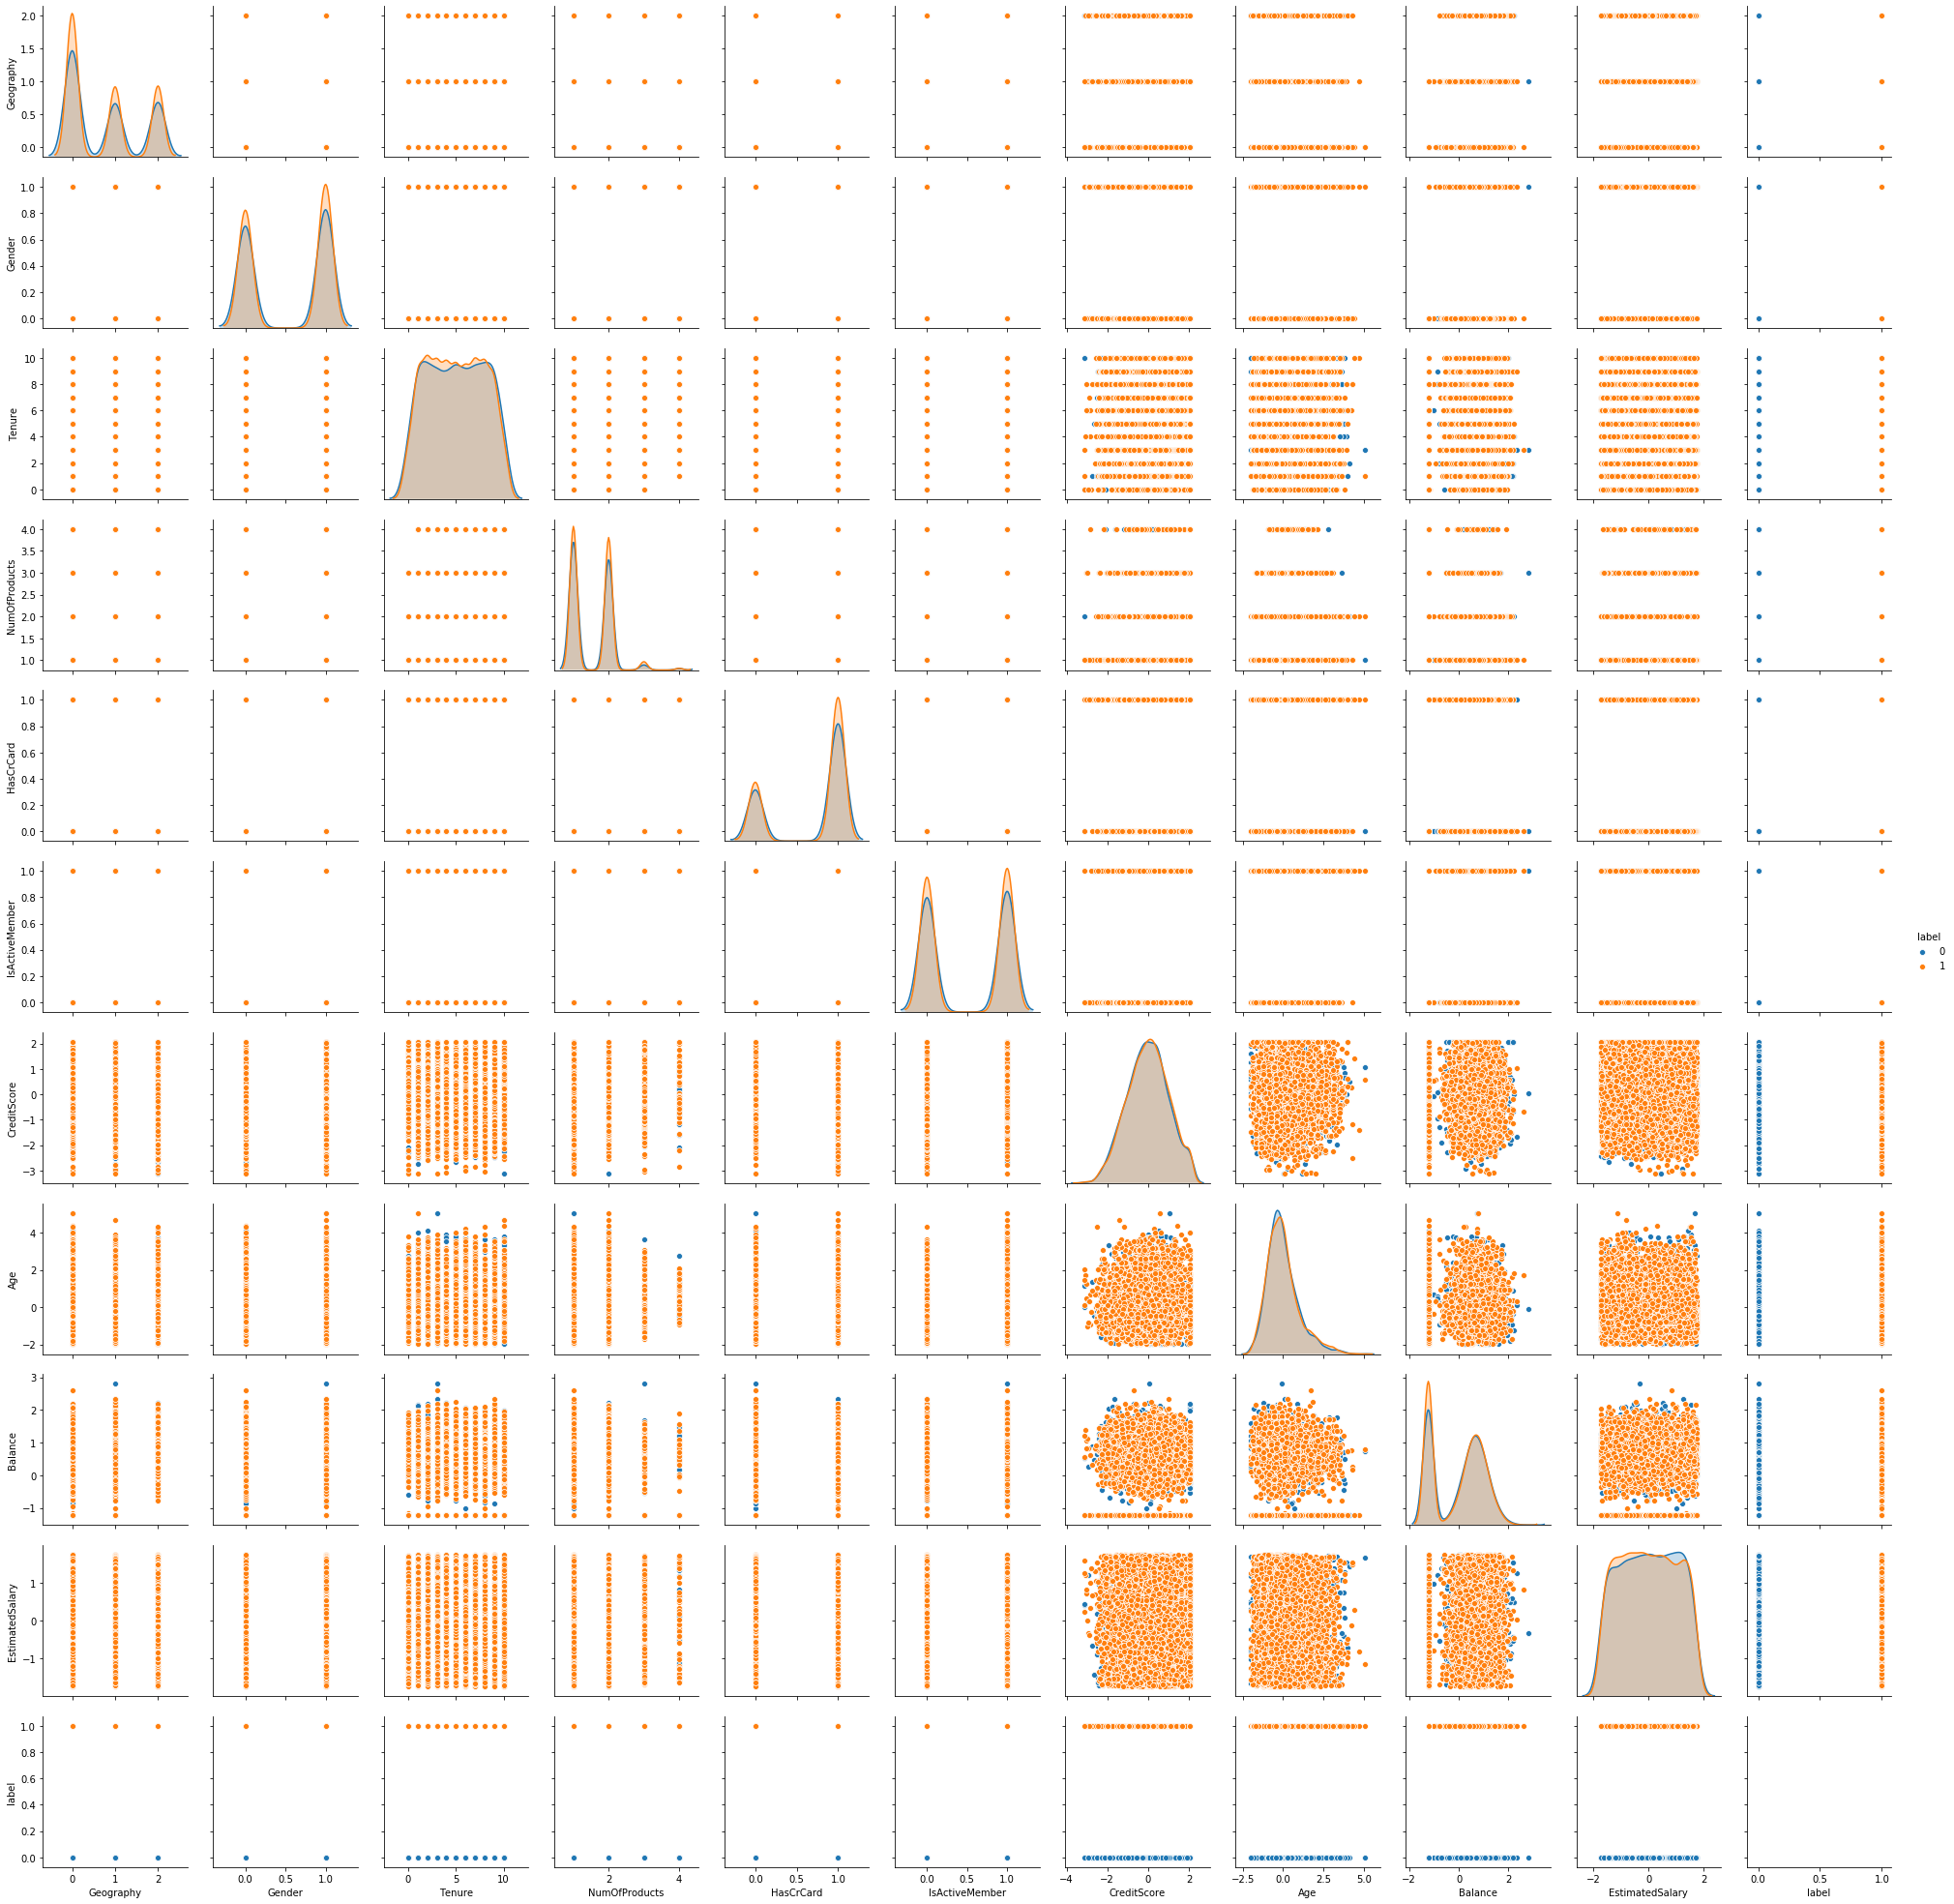

In [63]:
A=pd.concat([X_test,X_train])
sns.pairplot(A,hue='label')

FROM THE PAIRPLOT IT IS VISIBLE THAT: orange and blue distrbutions of almost all the variables are overlapping. Blue is test data and orange is train data. Distributions are similar hence we can confirm that our data is splitted quite randomly hence giving rise to no anomaly and bias.

### Fitting a base model and key observations.

We'll fit a base model after doing undersampling as the target variable is not balanced. We'll check the distribution of the data before and after undersampling to check there's no loss of information.

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [65]:
rus = RandomUnderSampler()

In [66]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [70]:
x_cols=X.columns

In [72]:
x_sampled, y_sampled = rus.fit_sample(X, y)
x_sampled = pd.DataFrame(x_sampled,columns=x_cols)
y_sampled = pd.DataFrame(y_sampled,columns=['Exited'])
x_train, x_test, y_train, y_test = train_test_split(x_sampled ,y_sampled ,test_size=0.3)
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\Mohd Zuhaib\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohd Zuhaib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
lr.score(x_train,y_train)

0.701508242721852

In [79]:
lr.score(x_test,y_test)

0.7228127555192151

In [83]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[446, 164],
       [175, 438]], dtype=int64)

No overfitting. Low score. Undersampled Data.

**Overall Accuracy**

Overall accuracy is 72.28 . Accuracy is average but we'll also have to check other metrics like recall or precision on the basis of business problem.

**Checking precision,recall and f1 score**

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       610
           1       0.73      0.71      0.72       613

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



Precision: 0.73, Recall: 0.71, f1-score: 0.72

Our objective is to lookout for customers who are churning hence where Exited=1. We'have to solve churn problem hence our model should focus on Increase True Positives. TP are customers which churned and were predcited to churn. A high Sensitivity is expected from the model as SENSITIVITY: TP/(TP+FN) i.e. True Positive Rate. A high TPR is important in this case of business scenario

**Significant Variables:**

In [87]:
import statsmodels.api as sm

In [88]:
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\Mohd Zuhaib\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 2851
Model:                            GLM   Df Residuals:                     2840
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1662.8
Date:                Tue, 14 Jan 2020   Deviance:                       3325.6
Time:                        12:04:11   Pearson chi2:                 2.91e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5948      0.158      3.774      0.000       0.286       0.904
Geography           0.3330      0.053      6.330      0.000       0.230       0.436
Gender             -0.6076      0.084     -7.198      0.000      -0.773      -0.442
Tenure             -0.0348      0.014     -2.415      0.016      -0.063      -0.007
NumOfProducts      -0.0726      0.063     -1.147      0.252      -0.197       0.051
HasCrCard          -0.0450      0.092     -0.487      0.626      -0.226       0.136
IsActiveMember     -0.8846      0.085    -10.385      0.000      -1.052      -0.718
CreditScore        -0.0857      0.042     -2.047      0.041      -0.168      -0.004
Age                 0.7583      0.046     16.520      0.000       0.668       0.848
Balance             0.2599      0.047      5.556      0.000       0.168       0.352
EstimatedSalary     0.0290      0.042      0.691      0.489      -0.053       0.111
===================================================================================
"""

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of churn. A p-value less than 0.05 signifies a decent feature.

We can also check coeff values:
The coefficient for balance says that, holding all others constant, we will see 3% increase in the odds of classified as churner for a one year increase in age since exp(0.0290) = 1.029

Significant features on the basis of p value: 
[Geography', 'Gender', 'Tenure','IsActiveMember', 'CreditScore', 'Age', 'Balance',]

OTHER METHOD TO CHECK SIGNIFICANT FEATURES: 


In [96]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
feature=pd.Series(rf.feature_importances_,index=X.columns)
feature

C:\Users\Mohd Zuhaib\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mohd Zuhaib\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Geography          0.041902
Gender             0.024185
Tenure             0.074875
NumOfProducts      0.121262
HasCrCard          0.020912
IsActiveMember     0.035580
CreditScore        0.136898
Age                0.254379
Balance            0.142123
EstimatedSalary    0.147883
dtype: float64

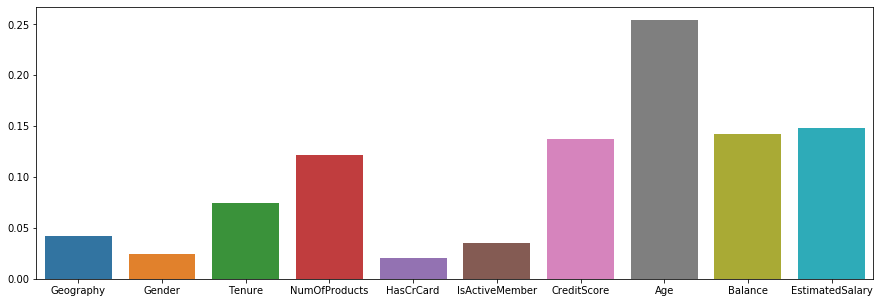

In [98]:
plt.figure(figsize=(15,5))
sns.barplot(feature.index,feature.values)
plt.show()

Significant features: Geography, Tenure, NumOfProducts,CreditScore, Age, Balance, EstimatedSalary

**Cohen Kappa:**

In [100]:
cohen_kappa_score(y_test, y_pred)

0.4456466366178049

Cohen’s kappa: a statistic that measures inter-annotator agreement. It is a score that expresses the level of agreement between two annotators on a classification problem. level of agreement on the classification that is done. It's very low in case of this model.

**Other key model output parameters to look at:**

ROC curve and AUC(Area under curve) is another important parameter to check, it is formed on various values of sensitivity and specificity we get while manipulating the threshold value for the Y probability upon which the target variable is classified. ROC-auc helps in tuning our threshold value and doing so will change metrics like precison and recall.

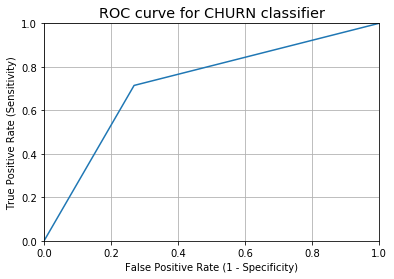

In [101]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for CHURN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [102]:
from sklearn.metrics import roc_auc_score ##roc area under the curve
roc_auc_score(y_test, y_pred)

0.7228331505896826

AUC-ROC is also comparitively low in this model

## Improving previous model and fitting the final model.

We'll fit various models and check accuracy and sensitivity. We'll then do hyper-Parameter Tuning and obtain a good model. We'll focus on cross validation to get overall good model.

In [104]:
#Random Forest - Ensemble of Descision Trees

rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)

C:\Users\Mohd Zuhaib\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
rf.score(x_train,y_train)

0.9964924587863907

In [105]:
rf.score(x_test,y_test)

0.7702371218315618

In [108]:
import warnings
warnings.filterwarnings('ignore')


MODEL IS overfitting. Lets do hyper parameter tuning.

In [109]:
scoresdt = cross_val_score(rf, x_train,y_train, cv=10)

In [110]:
scoresdt.mean()

0.7656932010416072

In [111]:
scoresdt = cross_val_score(rf,x_test,y_test, cv=10)

In [112]:
scoresdt.mean()

0.7587898174063709

Upon cross validation our model is performing very low quality as we can see once it acheived 99 accuracy also.

Hyper Parameter Tuning:

In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [114]:
fit_rf = RandomForestClassifier(random_state=100)
param_dist = {'max_depth':[2,3,4,5], 'bootstrap':[True,False], 'max_features':['sqrt','log2'], 'criterion':['gini','entropy']}

In [115]:
cv_rf = GridSearchCV(fit_rf, cv=5, param_grid=param_dist)
cv_rf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [116]:
cv_rf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt'}

In [184]:
rtree=RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth= 5,max_features='sqrt')

In [186]:
rtree.fit(x_train,y_train)
rtree.score(x_test,y_test)

0.7898609975470156

In [189]:
y_pred = rtree.predict(x_test)

In [190]:
confusion_matrix(y_test,y_pred)

array([[493, 117],
       [140, 473]], dtype=int64)

We can find no significant change in accuracy score. Also sensitivity = 78.79 which is increase from previous 72 percent.

In [124]:
(483)/(483+130) #sensitivity

0.7879282218597063

In [196]:
scoresdt=cross_val_score(rtree, x_train,y_train, cv=10)

In [197]:
scoresdt.mean()

0.7523868496218384

In [193]:
scoresdt.std() #low standard deviation supports a reliable model

0.023656445389830808

**AFTER many iterations and trial error down in this python notebook this is the best model. This model is used as a reference for summary**

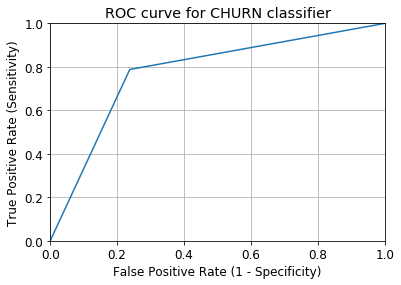

In [125]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for CHURN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [126]:
roc_auc_score(y_test, y_pred) #AUC of ROC also increased.

0.7751116519134598

**Extracting probability values to mould the threshold and get a better sensitivity score**

In [137]:
yp=rtree.predict_proba(x_test)

In [139]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(yp)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.252501
1,0.822570
2,0.174299
3,0.425905
4,0.801194


In [140]:
y_test_df = pd.DataFrame(y_test)

In [141]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [144]:
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [145]:
y_pred_final.head()

,Exited,Churn_Prob
0,0,0.252501
1,1,0.822570
2,0,0.174299
3,0,0.425905
4,1,0.801194


We have created data frame with probability values

In [146]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,Exited,Churn_Prob,predicted
0,0,0.252501,0
1,1,0.822570,1
2,0,0.174299,0
3,0,0.425905,0
4,1,0.801194,1


Finding Optimal Cutoff Point:
Optimal cutoff probability is that prob where we get high sensitivity.

In [147]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Exited,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.252501,0,1,1,1,0,0,0,0,0,0,0
1,1,0.822570,1,1,1,1,1,1,1,1,1,1,0
2,0,0.174299,0,1,1,0,0,0,0,0,0,0,0
3,0,0.425905,0,1,1,1,1,1,0,0,0,0,0
4,1,0.801194,1,1,1,1,1,1,1,1,1,1,0


We have taking different threshold values and will check accuracy and sensitivity on each one.

In [149]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_final.Exited, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.501226  0.000000  1.000000
0.1   0.1  0.501226  0.000000  1.000000
0.2   0.2  0.589534  0.181967  0.995106
0.3   0.3  0.682747  0.424590  0.939641
0.4   0.4  0.757972  0.667213  0.848287
0.5   0.5  0.775143  0.762295  0.787928
0.6   0.6  0.756337  0.877049  0.636215
0.7   0.7  0.719542  0.972131  0.468189
0.8   0.8  0.635323  0.995082  0.277325
0.9   0.9  0.524121  1.000000  0.050571


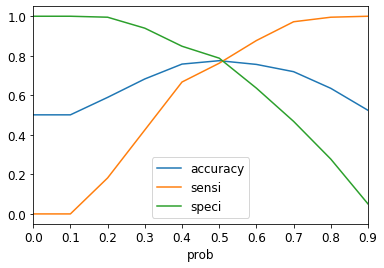

In [150]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

Let us try to understand this graph. This shows tradeoff between accuracy, specificity and sensitivity on different threshold values. The best  cutoff is 0.5. To get better sensitivity we can go above 0.5, Let us Take 0.7 and check sensitivity value. 

In [151]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Exited,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.252501,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.822570,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.174299,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.425905,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.801194,1,1,1,1,1,1,1,1,1,1,0,1


In [154]:
confusion_matrix( y_pred_final.Exited, y_pred_final.final_predicted )

array([[259, 351],
       [ 37, 576]], dtype=int64)

In [155]:
576/(576+37)

0.9396411092985318

SENSITIVITY: 576/(576+37) = 93.96% We have tuned our Random Forest model according to sensitivity.\
But we've traded accuracy with this. Now accuracy is:

In [158]:
accuracy_score( y_pred_final.Exited, y_pred_final.final_predicted)

0.6827473426001636

WE'll now focus on trying bagging and boosting techniques to improve our model.The benifit of bagging is that bootstrap samples are created and a good ensembled learning process is done. Also voting classifier is a good example of multi-model ensemble.

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

**BAGGING**

In [171]:
#Bagging using tuned random forest 

bg = BaggingClassifier(RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth= 5,max_features='sqrt'), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=5,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators='warn',
                                                        n_jobs=None,
   

In [172]:
bg.score(x_test,y_test)

0.7931316434995912

In [173]:
bg.score(x_train,y_train) 

0.7856892318484742

In [174]:
y_pred = bg.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[490, 120],
       [133, 480]], dtype=int64)

No major change in sensitivity or accuracy, increased very little.

**BOOSTING**

In [175]:
#Boosting - Ada Boost

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [176]:
adb.score(x_test,y_test)

0.7031888798037612

In [177]:
adb.score(x_train,y_train) #highly overfit model.

1.0

In [178]:
y_pred = bg.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[490, 120],
       [133, 480]], dtype=int64)

**Voting Classifier**

In [179]:
# Voting Classifier - Multiple Model Ensemble 

lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [180]:
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')
evc.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,...
                                        

In [181]:
evc.score(x_test, y_test)

0.7432542927228127

In [182]:
evc.score(x_train, y_train)

0.7842862153630306

No significant improvement.

## Summary:

**1. Summarizing the overall fit and features of a good model:**

Random forest model after doing hyperparameter tuning is the best model in hand\
Accuracy: 78%\
Sensitivity: 78%\
ROC(AUC): 77.5

Reasons:\
1) No overfit: model is performing similarly on test as well as train data. Hence it is reliable.\
2) Cross-validation: Cross validation score has a low standard deviation, and similar mean i.e. the model is reliable.\
3) Threshold Tweaking: The model can be tweaked as seen in threshold tweaking to get a very high sensitivity value of 93% which is good in certain business scenarios.\
4) Although the scores are not very high, the model is very stable and can be used commercialy.

**Business interpretation/explanation of the model and important variables:**

Business Interpretation: Our model focuses on improving the sensitivit score. The reason is while we look at the problem statement it is clear that customers exiting i.e. stop using the services of bank(churners) are effecting the revenue of bank. Hence the focus of this business statement is to find the churners correctly. When a customer has churned and was predicted to be a churner then such customers will be avoided by the bank. When our model reaches 80 percent sensitivity it means 80% of churners have been predicted correctly. When we changed the threshold to 0.7. All probability above 0.7 are considered churners then our sensitivity increased to 93% which means only a small fraction of churners are classified wrongly by the model.

In [187]:
feature=pd.Series(rtree.feature_importances_,index=X.columns)
feature

Geography          0.072347
Gender             0.037622
Tenure             0.009580
NumOfProducts      0.360761
HasCrCard          0.000549
IsActiveMember     0.091506
CreditScore        0.013488
Age                0.324094
Balance            0.071691
EstimatedSalary    0.018361
dtype: float64

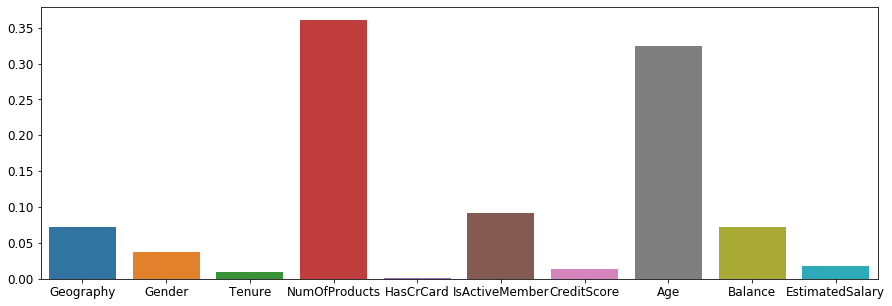

In [188]:
plt.figure(figsize=(15,5))
sns.barplot(feature.index,feature.values)
plt.show()

This graph chart is made using the tuned random forest model.\
Relatioship with target variable:\
Number of products: A very low churn ratio when numofproducts are 2. High churn in case of 3 and 4.\
Age: Churn customer has high median age and a smaller bracket of customer based on age.\
Geography:Lowest amount of churners from spain, germany has more churner RATIO. France churner ratio is the lowest.\
IsActiveMember:Very low ratio of churning in case of active members.\
Balance:Churned customers have a better balance amount

**Important changes from the base model:**

Changes and impact(summarised):\
1) Type of model: Switching from a Linear model to Random forest which is based on ensemble learning had a major impact on the performance of the model. Reason is that many decision trees are created and average of many samples are considered. Also Random Forest performs better with label Encoded Data.\
2) Hyper-Parameter tuning: Using grid search cv to get the best scoring hyperparameters combination improved the reliability of the model.\
3) Threshold Value Tweaking: This gave a better result according to the business need.\
4) Comparison: Compared with other models to get the best and most reliable.

**Risks:**

The major risk factor involved are the error. There are two types of error type I and type II. If a customer is predicted to be a churner but is not a churner, according to the model it'll be a not a good customer hence loosing that customer will be a potential revenue loss to the company. other error is if a churner is classified good as non churner then all the resources used on that customer will be lost which is a higher level of risk. Hence risks can be of two type according to the final model which will be deployed commercially.